<a href="https://colab.research.google.com/github/Someshwarms/prediction-of-energy-consumption-of-steel-industry/blob/main/Enery_prediction_of_steel_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
from sklearn.preprocessing import StandardScaler,MinMaxScaler

**Importing all the packages and the files which is needed for this project Link of the dataset:https://www.kaggle.com/csafrit2/steel-industry-energy-consumption**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
df.shape

(35040, 11)

In [4]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

**Checking if there is  null values is there or not**

In [5]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

**Extracting new information from the date column in the form of day,month,and year column**

In [6]:
df['Day']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.day

In [7]:
df['Month']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.month
df['Year']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.year

In [8]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Day,Month,Year
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


**Data Visualiziation**

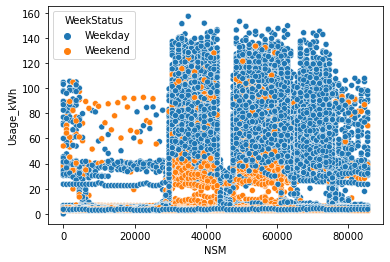

In [9]:
sns.scatterplot(x='NSM',y='Usage_kWh',hue='WeekStatus',data=df)

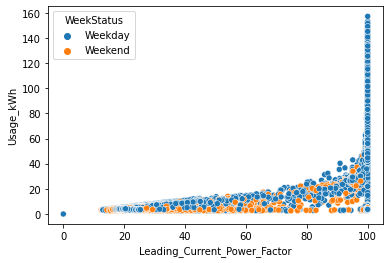

In [10]:
sns.scatterplot(x='Leading_Current_Power_Factor',y='Usage_kWh',hue='WeekStatus',data=df)

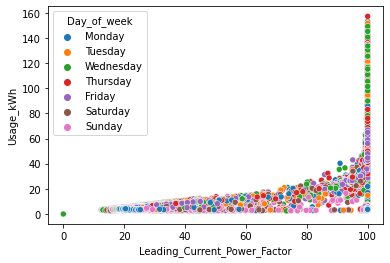

In [11]:
sns.scatterplot(x='Leading_Current_Power_Factor',y='Usage_kWh',hue='Day_of_week',data=df)

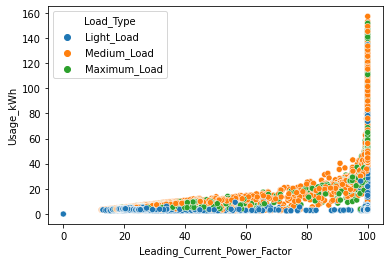

In [12]:
sns.scatterplot(x='Leading_Current_Power_Factor',y='Usage_kWh',hue='Load_Type',data=df)

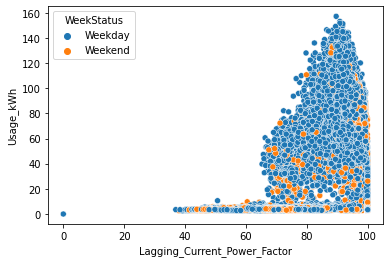

In [13]:
sns.scatterplot(x='Lagging_Current_Power_Factor',y='Usage_kWh',hue='WeekStatus',data=df)

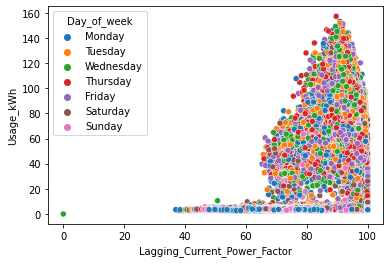

In [14]:
sns.scatterplot(x='Lagging_Current_Power_Factor',y='Usage_kWh',hue='Day_of_week',data=df)

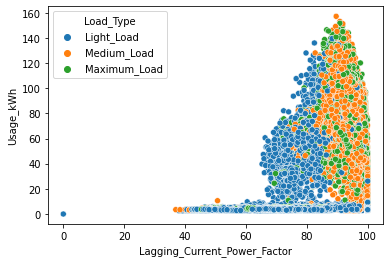

In [15]:
sns.scatterplot(x='Lagging_Current_Power_Factor',y='Usage_kWh',hue='Load_Type',data=df)

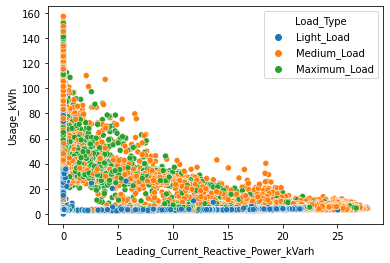

In [16]:
sns.scatterplot(x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh',hue='Load_Type',data=df)

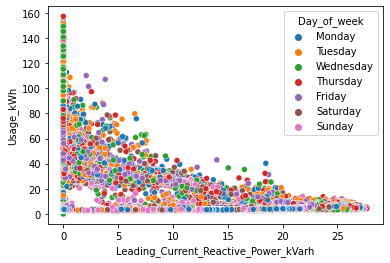

In [17]:
sns.scatterplot(x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh',hue='Day_of_week',data=df)

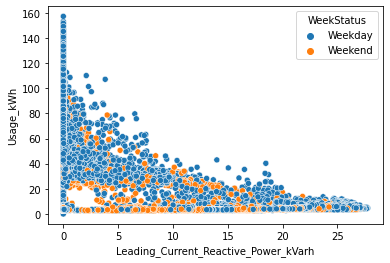

In [18]:
sns.scatterplot(x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh',hue='WeekStatus',data=df)

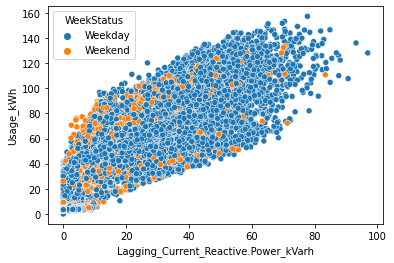

In [19]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='WeekStatus',data=df)

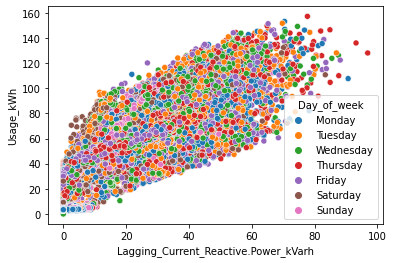

In [20]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='Day_of_week',data=df)

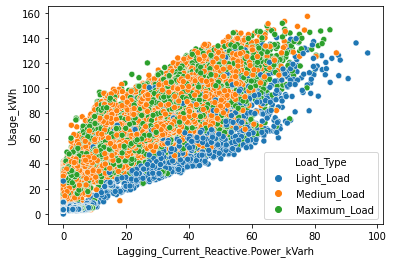

In [21]:
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='Load_Type',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


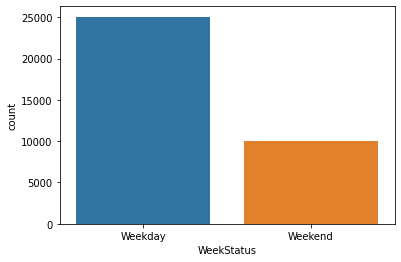

In [22]:
sns.countplot('WeekStatus',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


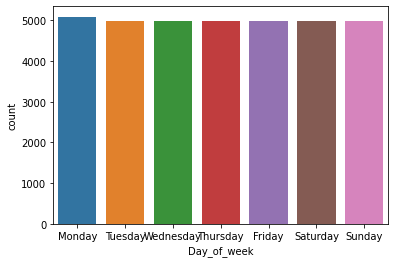

In [23]:
sns.countplot('Day_of_week',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


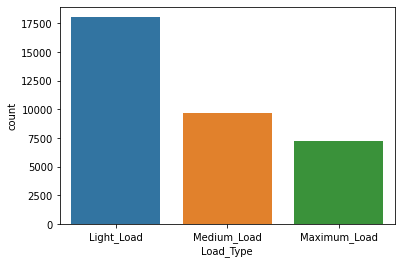

In [24]:
sns.countplot('Load_Type',data=df)

In [25]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Day,Month,Year
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


**Converting all the categorical value into numerical value for the model**

In [26]:
df['WeekStatus'].value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [27]:
df['WeekStatus'].replace(to_replace="Weekday",value=0,inplace=True)
df['WeekStatus'].replace(to_replace="Weekend",value=1,inplace=True)

In [29]:
df['WeekStatus'].value_counts()

0    25056
1     9984
Name: WeekStatus, dtype: int64

In [30]:
df['Day_of_week'].value_counts()

Monday       5088
Saturday     4992
Thursday     4992
Tuesday      4992
Wednesday    4992
Sunday       4992
Friday       4992
Name: Day_of_week, dtype: int64

In [31]:
df['Day_of_week'].replace(to_replace="Monday",value=1,inplace=True)
df['Day_of_week'].replace(to_replace="Tuesday",value=2,inplace=True)
df['Day_of_week'].replace(to_replace="Wednesday",value=3,inplace=True)
df['Day_of_week'].replace(to_replace="Thursday",value=4,inplace=True)
df['Day_of_week'].replace(to_replace="Friday",value=5,inplace=True)
df['Day_of_week'].replace(to_replace="Saturday",value=6,inplace=True)
df['Day_of_week'].replace(to_replace="Sunday",value=7,inplace=True)

In [32]:
df['Day_of_week'].value_counts()

1    5088
7    4992
6    4992
5    4992
4    4992
3    4992
2    4992
Name: Day_of_week, dtype: int64

In [33]:
df['Load_Type'].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [34]:
df['Load_Type'].replace(to_replace="Light_Load",value=2.1,inplace=True)
df['Load_Type'].replace(to_replace="Medium_Load",value=3.1,inplace=True)
df['Load_Type'].replace(to_replace="Maximum_Load",value=4.1,inplace=True)

In [35]:
df['Load_Type'].value_counts()

2.1    18072
3.1     9696
4.1     7272
Name: Load_Type, dtype: int64

In [36]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Day,Month,Year
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,2.1,1,1,2018
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,2.1,1,1,2018
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,2.1,1,1,2018
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,2.1,1,1,2018
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,2.1,1,1,2018


In [37]:
X=df.drop(['date','Usage_kWh'],axis=1)#independent
y=df['Usage_kWh']#dependent

In [38]:
X.shape

(35040, 12)

In [39]:
y.shape

(35040,)

In [40]:
X.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Day,Month,Year
0,2.95,0.0,0.0,73.21,100.0,900,0,1,2.1,1,1,2018
1,4.46,0.0,0.0,66.77,100.0,1800,0,1,2.1,1,1,2018
2,3.28,0.0,0.0,70.28,100.0,2700,0,1,2.1,1,1,2018
3,3.56,0.0,0.0,68.09,100.0,3600,0,1,2.1,1,1,2018
4,4.50,0.0,0.0,64.72,100.0,4500,0,1,2.1,1,1,2018


In [41]:
y.head()

0    3.17
1    4.00
2    3.24
3    3.31
4    3.82
Name: Usage_kWh, dtype: float64

**Checking if there is correlation is present or not between the column based on that we will decide for feture selection**

In [42]:
X.corr()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Day,Month,Year
Lagging_Current_Reactive.Power_kVarh,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,-3.198698e-01,-2.562275e-01,0.451899,-1.212823e-02,-4.213561e-02,NaN
Leading_Current_Reactive_Power_kVarh,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,2.604306e-01,2.129219e-01,0.001776,-1.366688e-02,-2.709951e-02,NaN
CO2(tCO2),0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,-2.904670e-01,-2.352975e-01,0.610653,-6.095822e-04,-1.083105e-01,NaN
Lagging_Current_Power_Factor,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,5.408210e-02,4.246488e-02,0.519189,2.568839e-02,-8.705239e-02,NaN
Leading_Current_Power_Factor,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,-3.146749e-01,-2.576774e-01,0.075394,7.403688e-03,-3.232157e-02,NaN
NSM,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,4.599301e-17,-1.383060e-17,0.482767,6.057718e-18,-5.505704e-19,NaN
WeekStatus,-0.319870,0.260431,-0.290467,0.054082,-0.314675,4.599301e-17,1.000000e+00,7.903022e-01,-0.199950,-9.616887e-03,1.283896e-02,NaN
Day_of_week,-0.256227,0.212922,-0.235298,0.042465,-0.257677,-1.383060e-17,7.903022e-01,1.000000e+00,-0.168947,-7.592801e-03,1.252494e-02,NaN
Load_Type,0.451899,0.001776,0.610653,0.519189,0.075394,4.827670e-01,-1.999500e-01,-1.689472e-01,1.000000,1.397372e-02,-1.285381e-02,NaN
Day,-0.012128,-0.013667,-0.000610,0.025688,0.007404,6.057718e-18,-9.616887e-03,-7.592801e-03,0.013974,1.000000e+00,1.189318e-02,NaN


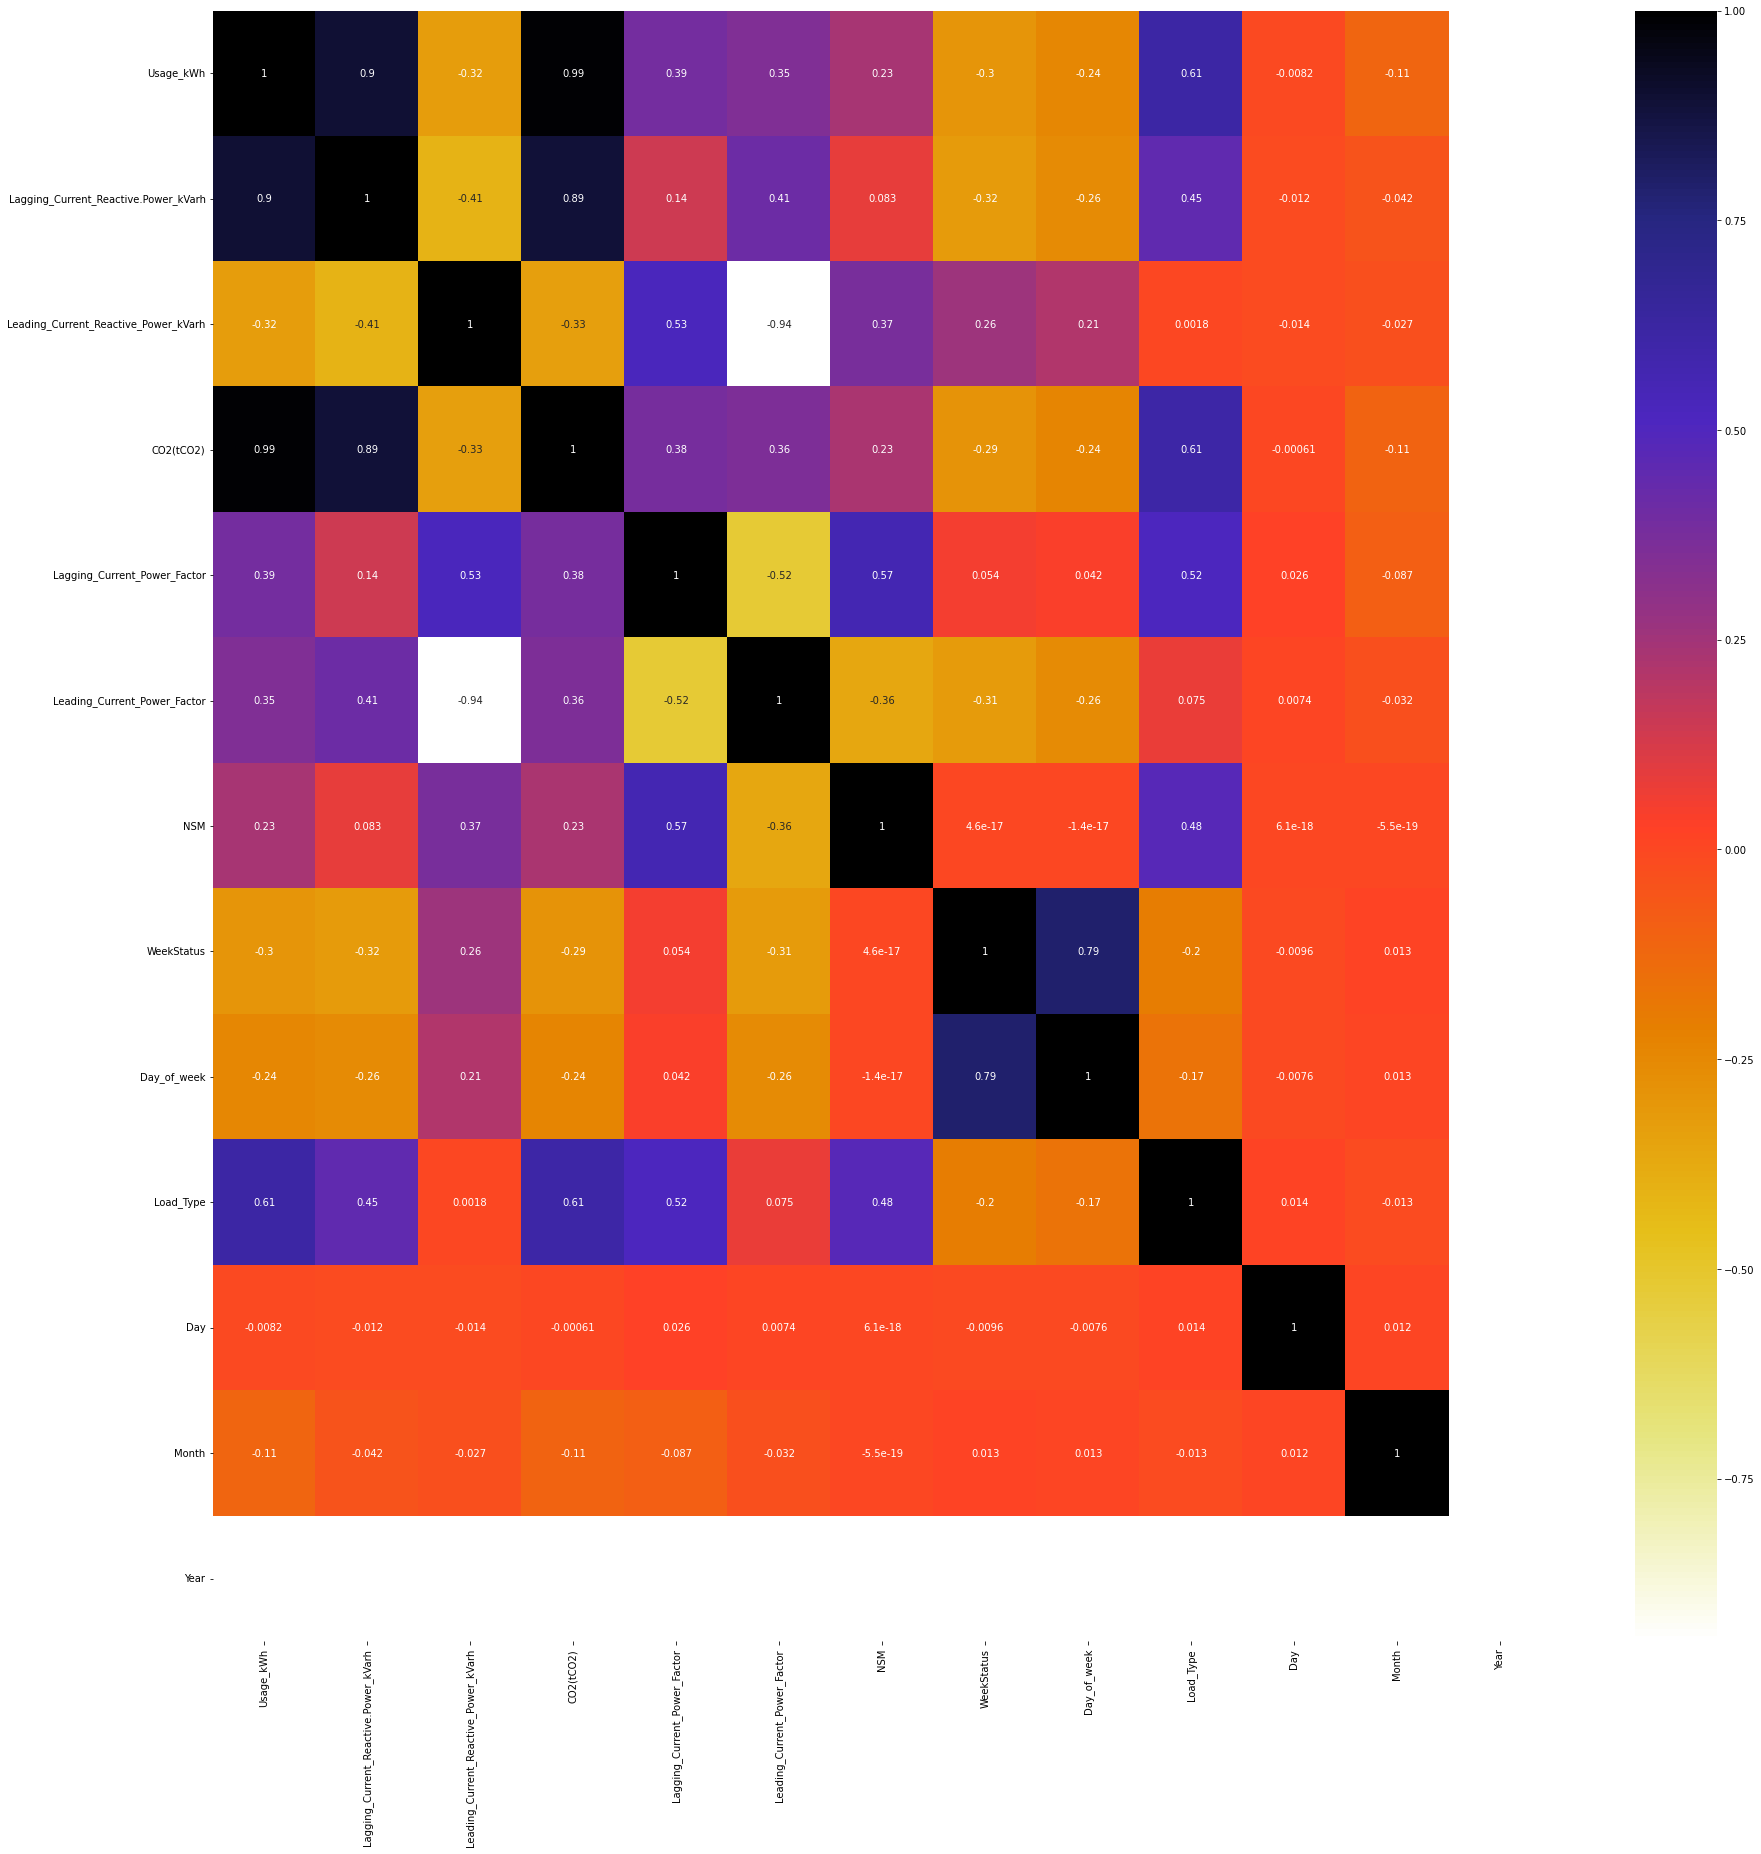

In [43]:
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

1

In [46]:
corr_features

{'Leading_Current_Power_Factor'}

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
X_train.shape

(24528, 12)

In [49]:
X_test.shape

(10512, 12)

In [50]:
y_train.shape

(24528,)

In [51]:
y_test.shape

(10512,)

**Model Training with Ensemble Technique**

**RandomForestRegressor**

In [52]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [53]:
y_pred

array([  2.8736,  60.5251, 122.262 , ...,   3.0645,   2.5879,   4.4031])

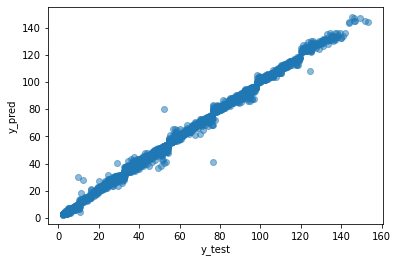

In [54]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [55]:
r2_score(y_pred,y_test)

0.9989518110120245

In [56]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE: 1.1729547292988947
MAE: 0.38867038622526584
RMSE: 1.0830303455115626


**AdaBoostRegressor**

In [58]:
model1=AdaBoostRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [59]:
y_pred1

array([  7.94817867,  64.08950989, 121.42653084, ...,   7.7026151 ,
         7.7026151 ,   7.94817867])

In [60]:
r2_score(y_pred1,y_test)

0.9726079047003855

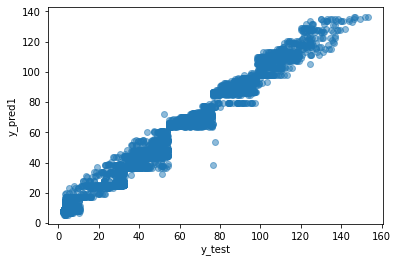

In [66]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [62]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 27.881783707783736
MAE: 4.641039465818817
RMSE: 5.2803204171511915


**GradientBoostingRegressor**

In [63]:
model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [64]:
y_pred2

array([  3.00405769,  63.42357812, 126.96682467, ...,   3.06929018,
         3.00699383,   4.55854119])

In [65]:
r2_score(y_pred2,y_test)

0.9922413813304949

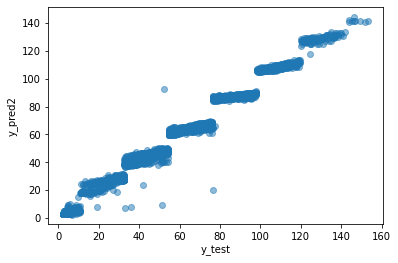

In [67]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [68]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 8.659717322574789
MAE: 1.7473254628555122
RMSE: 2.942739764670806


**XGBoostRegressor**

In [69]:
model3=xgboost.XGBRegressor()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

[14:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
y_pred3

array([  3.0958598,  63.916428 , 126.6823   , ...,   3.168257 ,
         3.0136611,   4.5459914], dtype=float32)

In [71]:
r2_score(y_pred3,y_test)

0.9923014678414229

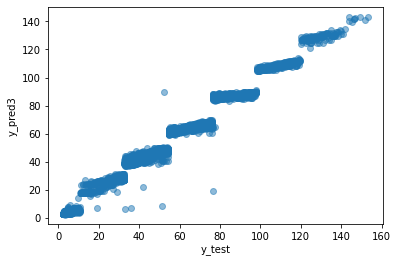

In [72]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [73]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 8.593937330470418
MAE: 1.7384946744717782
RMSE: 2.9315418009079144


**Using Regression based Algorithm**

**LinearRegression**

In [74]:
model4=LinearRegression()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

In [75]:
y_pred4

array([  2.77263871,  70.48916546, 125.12774732, ...,   1.35158183,
         2.09025357,   5.23867866])

In [76]:
r2_score(y_pred4,y_test)

0.9839452320716416

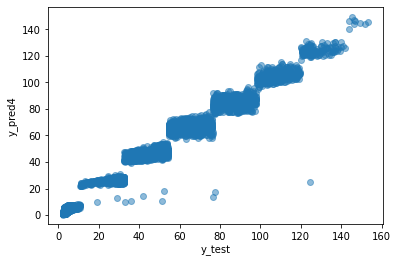

In [77]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [78]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 17.761943894270015
MAE: 2.581664400466562
RMSE: 4.214492127679208


**Using SVR from Support Vector Machine**

**SVR**

In [87]:
model5=SVR()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)

In [88]:
y_pred5

array([13.78273856, 42.00385664, 39.48552999, ..., 10.03583155,
       10.03571507,  2.67039008])

In [89]:
r2_score(y_pred5,y_test)

-1.657552828180168

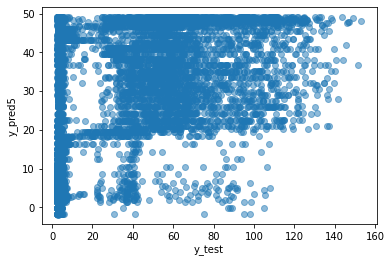

In [90]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [91]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred5,y_test)))

MSE: 810.4005223951565
MAE: 19.275154617479664
RMSE: 28.467534533133644


**i.MSE,MAE,RMSE value for regression data:**

**1.RandomForestRegressor:**
*   **MSE: 1.1729547292988947**
*   **MAE: 0.38867038622526584**
*   **RMSE: 1.0830303455115626**

**2.AdaBoostRegressor:**

*   **MSE: 27.881783707783736**
*   **MAE: 4.641039465818817**
*   **RMSE: 5.2803204171511915**

3.**GradientBoostingRegressor:**

*   **MSE: 8.659717322574789**
*   **MAE: 1.7473254628555122**
*   **RMSE: 2.942739764670806**

4.**XGBRegressor:**

*   **MSE: 8.593937330470418**
*   **MAE: 1.7384946744717782**
*   **RMSE: 2.9315418009079144**

5.**LinearRegression:**

*   **MSE: 17.761943894270015**
*   **MAE: 2.581664400466562**
*   **RMSE: 4.214492127679208**

6.**SVM:**

*   **MSE: 810.4005223951565**
*   **MAE: 19.275154617479664**
*   **RMSE: 28.467534533133644**

In [57]:
prediction=model.predict([[3.82	,0.0	,0.00	,60.20	,100.00	,26100	,1	,7	,2.1	,29	,4	,2018]])
print("Energy consumption of the steel industry:",prediction)

Energy consumption of the steel industry: [2.8736]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Conculsion:I used too many different algorithms for model development but out of all of them RandomForest performed way better then other algorithms**